### Setup libraries and parameters

In [10]:
from datasets import Dataset
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame


RAG_type = "RAG_filter_retriever"
chunking_type = "fixed_number"
chunk_size = 512
chunk_overlap = 100
model_name = "text_embedding_3_large"
GENERATOR_MODEL_NAME = "GPT_4o_mini"

if chunking_type == "page_chunking":
  chunking = chunking_type
else:
    chunking = f"{chunk_size}_{chunk_overlap}"

settings_name = f"../evaluation/output/{GENERATOR_MODEL_NAME}/Text+Images/{RAG_type}/{model_name}/rag_chunk:{chunking}_embeddings:{model_name}_reader-model:{GENERATOR_MODEL_NAME}"
path1 = f"{settings_name}/results_easy.json"
path2 = f"{settings_name}/results_years_countries.json"
path3 = f"{settings_name}/results_countries&years_brands.json"

### RAGAS boxplots

Text(0.5, 1.0, 'TE3L, (512, 100), RAG_filter_retriever')

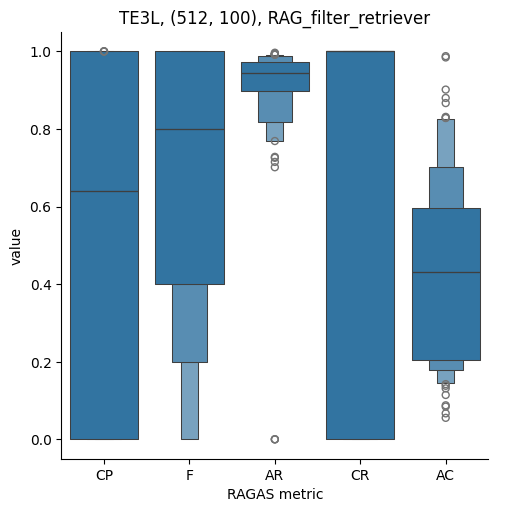

In [13]:
dataset1 = Dataset.from_json(path1)
dataset2 = Dataset.from_json(path2)
dataset3 = Dataset.from_json(path3)

metrics = {"cp": "CP", "f": "F", "ar": "AR", "cr": "CR", "ac": "AC"}
data = DataFrame({
    metrics[metric]: list(dataset1[metric]) + 
            list(dataset2[metric]) + 
            list(dataset3[metric]) 
    for metric in metrics
})
data_melted = data.melt(var_name = "RAGAS metric", value_name = "value")

sns.catplot(x = "RAGAS metric", y = "value", data = data_melted, kind = "boxen")
plt.title(f"TE3L, ({chunk_size}, {chunk_overlap}), {RAG_type}")


### Intersection boxplot

Text(0.5, 1.0, 'TE3L, (512, 100), RAG_filter_retriever')

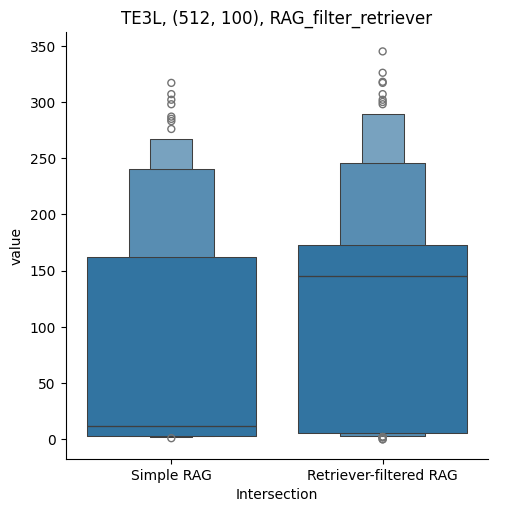

In [20]:
Dataset.from_json(path1)
Dataset.from_json(path2)
Dataset.from_json(path3)

settings_name_easy = f"../evaluation/output/{GENERATOR_MODEL_NAME}/Text+Images/RAG_simple/{model_name}/rag_chunk:{chunking}_embeddings:{model_name}_reader-model:{GENERATOR_MODEL_NAME}"
settings_name_filter_retriever = f"../evaluation/output/{GENERATOR_MODEL_NAME}/Text+Images/RAG_filter_retriever/{model_name}/rag_chunk:{chunking}_embeddings:{model_name}_reader-model:{GENERATOR_MODEL_NAME}"

path1 = f"{settings_name_easy}/results_easy.json"
path2 = f"{settings_name_easy}/results_years_countries.json"
path3 = f"{settings_name_easy}/results_countries&years_brands.json"
datasets_simple = [Dataset.from_json(path1), Dataset.from_json(path2), Dataset.from_json(path3)]

path1 = f"{settings_name_filter_retriever}/results_easy.json"
path2 = f"{settings_name_filter_retriever}/results_years_countries.json"
path3 = f"{settings_name_filter_retriever}/results_countries&years_brands.json"
datasets_filter_retriever = [Dataset.from_json(path1), Dataset.from_json(path2), Dataset.from_json(path3)]

intersections_simple = [list(ds["intersection"][0].values()) if i != 0 else ds["intersection"] for i, ds in enumerate(datasets_simple)]
intersections_simple = [item for sublist in intersections_simple for item in sublist]

intersections_filter_retriever = [ds["intersection"] for ds in datasets_filter_retriever]
intersections_filter_retriever = [item for sublist in intersections_filter_retriever for item in sublist]

unions_simple = [list(ds["union"][0].values()) if i != 0 else ds["union"] for i, ds in enumerate(datasets_simple)]
unions_simple = [item for sublist in unions_simple for item in sublist]

unions_filter_retriever = [ds["union"] for ds in datasets_filter_retriever]
unions_filter_retriever = [item for sublist in unions_filter_retriever for item in sublist]

jaccard_simple = [intersections_simple[i]/unions_simple[i] for i in range(len(intersections_simple))]
jaccard_filter_retriever = [intersections_filter_retriever[i]/unions_filter_retriever[i] for i in range(len(intersections_filter_retriever))]

data = DataFrame({
    "Simple RAG": intersections_simple,
    "Retriever-filtered RAG": intersections_filter_retriever
})
data_melted = data.melt(var_name = "Intersection", value_name = "value")

sns.catplot(x = "Intersection", y = "value", data = data_melted, kind = "boxen")

plt.title(f"TE3L, ({chunk_size}, {chunk_overlap}), {RAG_type}")